In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug_data_to_load)


clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
df = pd.merge(clinical_data, mouse, on="Mouse ID", how="left")
len(df)
# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_time_groups = df.groupby(["Drug","Timepoint"])

# Convert to DataFrame
tumor_response_mean = drug_time_groups['Tumor Volume (mm3)'].mean()
tumor_response_mean = tumor_response_mean.reset_index()

# Preview DataFrame
tumor_response_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [8]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_response_se = drug_time_groups['Tumor Volume (mm3)'].sem()
tumor_response_se = tumor_response_se.reset_index()

# Preview DataFrame
tumor_response_se.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [55]:
# Minor Data Munging to Re-Format the Data Frames
tr_group_mean = tumor_response_mean.groupby(['Timepoint','Drug'])['Tumor Volume (mm3)'].aggregate('first').unstack()
tr_group_mean = tr_group_mean.reset_index()
# Preview that Reformatting worked
tr_group_mean

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


In [11]:
tr_group_se = tumor_response_se.groupby(['Timepoint','Drug'])['Tumor Volume (mm3)'].aggregate('first').unstack()
# Preview that Reformatting worked
tr_group_se = tr_group_se.reset_index()
tr_group_se.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


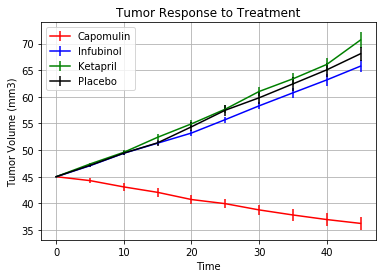

In [30]:
# Generate the Plot (with Error Bars)
x= tr_group_mean["Timepoint"]
Capomulin_y = tr_group_mean["Capomulin"]
Infubinol_y = tr_group_mean["Infubinol"]
Ketapril_y = tr_group_mean["Ketapril"]
Placebo_y = tr_group_mean["Placebo"]

Capomulin_e = tr_group_se["Capomulin"]
Infubinol_e = tr_group_se["Infubinol"]
Ketapril_e = tr_group_se["Ketapril"]
Placebo_e = tr_group_se["Placebo"]

plt.errorbar(x, Capomulin_y, yerr=Capomulin_e, color='red', label="Capomulin")
plt.errorbar(x, Infubinol_y, yerr=Infubinol_e, color='blue', label="Infubinol")
plt.errorbar(x, Ketapril_y, yerr=Ketapril_e, color='green', label="Ketapril")
plt.errorbar(x, Placebo_y, yerr=Placebo_e, color='black', label="Placebo")

plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
plt.legend(loc="best")
plt.grid()

# Save the Figure
plt.savefig('tumor_response_to_treatment.png')


In [ ]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [31]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site_mean = drug_time_groups['Metastatic Sites'].mean()
met_site_mean = met_site_mean.reset_index()

# Preview DataFrame
met_site_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [33]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_site_se = drug_time_groups['Metastatic Sites'].sem()
met_site_se = met_site_se.reset_index()

# Preview DataFrame
met_site_se.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [34]:
# Minor Data Munging to Re-Format the Data Frames
ms_group_mean = met_site_mean.groupby(['Timepoint','Drug'])['Metastatic Sites'].aggregate('first').unstack()
ms_group_mean = ms_group_mean.reset_index()
# Preview that Reformatting worked
ms_group_mean.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [35]:
# Minor Data Munging to Re-Format the Data Frames
ms_group_se = met_site_se.groupby(['Timepoint','Drug'])['Metastatic Sites'].aggregate('first').unstack()
ms_group_se = ms_group_se.reset_index()
# Preview that Reformatting worked
ms_group_se.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
3,15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
4,20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


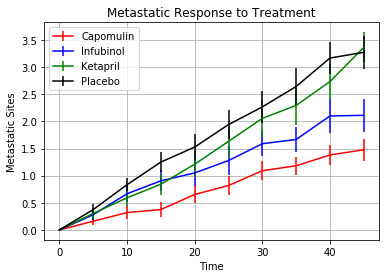

In [36]:
# Generate the Plot (with Error Bars)
x= ms_group_mean["Timepoint"]
Capomulin_y = ms_group_mean["Capomulin"]
Infubinol_y = ms_group_mean["Infubinol"]
Ketapril_y = ms_group_mean["Ketapril"]
Placebo_y = ms_group_mean["Placebo"]

Capomulin_e = ms_group_se["Capomulin"]
Infubinol_e = ms_group_se["Infubinol"]
Ketapril_e = ms_group_se["Ketapril"]
Placebo_e = ms_group_se["Placebo"]

plt.errorbar(x, Capomulin_y, yerr=Capomulin_e, color='red', label="Capomulin")
plt.errorbar(x, Infubinol_y, yerr=Infubinol_e, color='blue', label="Infubinol")
plt.errorbar(x, Ketapril_y, yerr=Ketapril_e, color='green', label="Ketapril")
plt.errorbar(x, Placebo_y, yerr=Placebo_e, color='black', label="Placebo")

plt.xlabel("Time")
plt.ylabel("Metastatic Sites")
plt.title("Metastatic Response to Treatment")
plt.legend(loc="best")
plt.grid()

# Save the Figure
plt.savefig('metastatic_response_to_treatment.png')

plt.show()

## Survival Rates

In [41]:
# Store the Count of Mice Grouped by Drug and Timepoint (We can pass any metric)
mouse_count = drug_time_groups['Metastatic Sites'].count()
mouse_count = mouse_count.reset_index()
mouse_count = mouse_count.rename(columns = {"Metastatic Sites":'Mouse Count'})

# Preview DataFrame
mouse_count.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [43]:
mouse_group = mouse_count.groupby(['Timepoint','Drug'])['Mouse Count'].aggregate('first').unstack()
mouse_group = mouse_group.reset_index()
# Preview that Reformatting worked
mouse_group

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17
5,25,22,18,18,19,18,17,14,23,19,16
6,30,22,16,17,18,15,15,13,23,18,15
7,35,22,14,12,17,15,14,10,21,16,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


In [49]:
cols = ['Capomulin', 'Infubinol', 'Ketapril','Placebo']
mouse_group[cols] = (mouse_group[cols]/mouse_group[cols].values[0,:]).multiply(100)
mouse_group

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,100.0,25,100.0,100.0,25,100.0,26,25,26,25
1,5,100.0,21,100.0,92.0,23,96.0,25,25,25,24
2,10,100.0,20,84.0,88.0,21,96.0,23,24,23,22
3,15,96.0,19,84.0,76.0,21,80.0,17,24,23,21
4,20,92.0,18,80.0,76.0,20,76.0,17,23,21,17
5,25,88.0,18,72.0,76.0,18,68.0,14,23,19,16
6,30,88.0,16,68.0,72.0,15,60.0,13,23,18,15
7,35,88.0,14,48.0,68.0,15,56.0,10,21,16,14
8,40,84.0,14,40.0,60.0,15,48.0,9,20,12,14
9,45,84.0,13,36.0,44.0,13,44.0,7,20,11,14


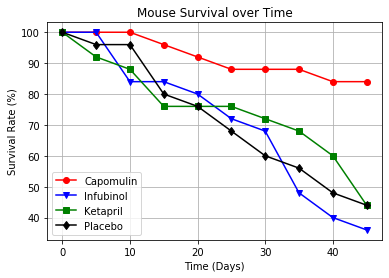

In [54]:
# Generate the Plot (with Error Bars)
x= mouse_group["Timepoint"]
Capomulin_y = mouse_group["Capomulin"]
Infubinol_y = mouse_group["Infubinol"]
Ketapril_y = mouse_group["Ketapril"]
Placebo_y = mouse_group["Placebo"]

plt.plot(x, Capomulin_y, color='red', marker ='o', label="Capomulin")
plt.plot(x, Infubinol_y, color='blue', marker ='v', label="Infubinol")
plt.plot(x, Ketapril_y, color='green', marker ='s', label="Ketapril")
plt.plot(x, Placebo_y, color='black', marker ='d', label="Placebo")

plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Mouse Survival over Time")
plt.legend(loc="best")
plt.grid()

# Save the Figure
plt.savefig('mouse_survival_rate.png')

# Show the Figure
plt.show()

## Summary Bar Graph

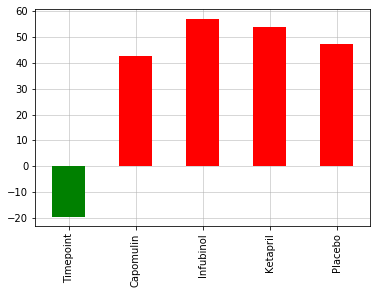

In [84]:
# Calculate the percent changes for each drug
percent_change = tr_group_mean.iloc[[0,9],[1,2,4,5,7]]
percent_change.columns = ['Timepoint','Capomulin','Infubinol',
                     'Ketapril','Placebo']
percent_change = percent_change.transpose()
percent_change['Percent Change'] = ((percent_change[9]-percent_change[0] )/percent_change[0])*100
percent_change = percent_change.drop(columns=[0,9])

percent_change['positive'] = percent_change['Percent Change'] > 0

fig, ax = plt.subplots()
percent_change['Percent Change'].plot(kind="bar",color=percent_change.positive.map({True: 'r', False: 'g'}))
# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Customize the grid
ax.grid(linestyle='-', linewidth='0.5')

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()